# ML WEEK 1

본 과제는 numpy와 pandas, 그리고 EDA를 아주 간단하게 다룹니다.

중간중간에 있는 문제들을 풀어보면서 가볍게 리마인드 하시면 좋을 것 같습니다.

참고자료:

- \[An Introduction to Statistical Learning with Applications on Python\] (무료) https://www.statlearning.com/

- 파이썬 머신러닝 완벽 가이드(개정 2판)

- https://wikidocs.net/4307 (점프투 파이썬 위키북스 2, 3, 4 장, python 문법이 익숙하지 않은 경우)


만약 시간이 남는다면, numpy나 pandas가 가지고 있는 추가 기능을 여러가지 찾아 실행해 보시고 그 과정을 남겨 주셔도 좋습니다!



# 모듈 불러오기

python으로 머신러닝을 구현할 때 주로 쓰이는 모듈입니다.

- `numpy` 행렬연산
- `pandas` 데이터 전처리
- `matplotlib` 그래프 시각화
- `seaborn` 그래프 시각화
- `scikit-learn` 머신러닝 모델 학습

In [1]:
# 모듈 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Numpy

Numpy의 ndarray를 이용해 다차원 배열을 쉽게 생성하고, 다양한 연산을 수행할 수 있습니다.

In [2]:
# 넘파이 배열(행렬) 생성하기

x = np.array([1, 2, 3])
y = np.array([2, 3, 4])
z = np.array([[1, 2, 3], [2, 3, 4]])

w = np.array([[1, 2, 3]])

In [4]:
# Q1. 배열의 타입과 형태, 차원을 각각 구해주세요.

print("x:", x.dtype, x.shape, x.ndim)
print("y:", y.dtype, y.shape, y.ndim)
print("z:", z.dtype, z.shape, z.ndim)
print("w:", w.dtype, w.shape, w.ndim)



x: int32 (3,) 1
y: int32 (3,) 1
z: int32 (2, 3) 2
w: int32 (1, 3) 2


In [5]:
# 원소끼리의 연산 수행

print(x + y)
print(x - y)
print(x * y)

x1 = np.array([1, 2, 3])
y1 = np.array([1, 2, 3, 4])

# 배열의 크기가 같은 경우에만 연산을 적용할 수 있습니다.
x1 + y1

[3 5 7]
[-1 -1 -1]
[ 2  6 12]


ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [6]:
# 리스트를 ndarray로 쉽게 변경할 수 있습니다.

lst1 = [1, 2, 3]
lst2 = [4, 5, 6]
lst3 = [7, 8, 9]
print(type(lst1))

arr = np.array([lst1, lst2, lst3])
print(type(arr))

arr

<class 'list'>
<class 'numpy.ndarray'>


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [7]:
# numpy 내의 데이터값은 숫자, 문자열, 불 값 등 모두 가능합니다.
# 한 개의 ndarray 객체에 int와 float가 함께 있을 수 없습니다.

print(np.array([1, 2, 3]).dtype)
print(np.array([1, 2, 3.]).dtype)

print(np.array([1, 2, 'test']).dtype)

int32
float64
<U11


In [8]:
# reshape() 함수를 이용해 형태나 차원의 크기를 변경합니다.

array1 = np.zeros(9, dtype = 'int32')
array1.reshape(3, 3)
print(array1)

array2 = np.arange(10)
print(array2.reshape(-1, 5))
print(array2.reshape(5, -1))

array3 = np.arange(8).reshape(2, 2, 2)
print(array3.tolist())


[0 0 0 0 0 0 0 0 0]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[[0, 1], [2, 3]], [[4, 5], [6, 7]]]


In [9]:
# 넘파이 인덱싱

array2 = array2.reshape(-1,)
print(array2)

print(array2[3])
print(array2[3:5]) #  슬라이싱

print(array2[-1], array2[-2])

[0 1 2 3 4 5 6 7 8 9]
3
[3 4]
9 8


In [10]:
# ndarray 내의 데이터 값을 간단히 수정할 수 있습니다.

array2[3] = 7
array2[7] = 3

print(array2)

[0 1 2 7 4 5 6 3 8 9]


In [12]:
# Q2. array2에서 데이터 값이 4보다 큰 데이터만 추출해 주세요. (2가지 이상의 방법 이용)

result1 = array2[array2 > 4]
print(result1)

result2 = array2[np.where(array2 > 4)]
print(result2)


[7 5 6 8 9]
[7 5 6 8 9]


In [13]:
# 정렬

score = np.array([78, 95, 84, 98, 88])

score_sorted = np.sort(score)
print(score_sorted)

# 내림차순 정렬
score_sorted_desc = np.sort(score)[::-1]
print(score_sorted_desc)


score2 = np.array([[3, 2, 1], [6, 5, 4]])

sorted_by_row = np.sort(score2, axis=1)  # 각 행을 정렬
print(sorted_by_row)

sorted_by_column = np.sort(score2, axis=0)  # 각 열을 정렬
print(sorted_by_column)


[78 84 88 95 98]
[98 95 88 84 78]
[[1 2 3]
 [4 5 6]]
[[3 2 1]
 [6 5 4]]


In [14]:
# 행렬 연산

A = np.array([[1, 2, 3], [4, 5, 6]])

B = np.array([[7, 8], [9, 10], [11, 12]])

# 행렬의 내적 구하기(행렬곱)
dot_product = np.dot(A, B)
print(dot_product)

# 전치 행렬 구하기
print(np.transpose(A))

[[ 58  64]
 [139 154]]
[[1 4]
 [2 5]
 [3 6]]


# Pandas

In [15]:
# pandas Series: 리스트나 넘파이 배열과 비슷합니다.

s = pd.Series([10, 20, 30])
print(s)

0    10
1    20
2    30
dtype: int64


In [16]:
# 판다스 데이터프레임 : 2차원 테이블 구조

data1 = {'Name': ['Alice', 'Bob'], 'Age': [25, 30]}
df = pd.DataFrame(data1)
print(df)

    Name  Age
0  Alice   25
1    Bob   30


In [19]:
data2 = pd.DataFrame({'Planet': ['Earth', 'Mars', 'Jupyter', 'Saturn', 'Neptune'],
          'Moons': [1, 2, 79, 83, 14],
          'Diameter_km':[12472, 6779, 139820, 116460, 49244],
          'Has_Rings': [False, False, True, True, True]})


In [20]:
# 데이터 선택과 필터링

print(data2['Moons'])

# 고리가 있는 행성만 선택
print(data2[data2["Has_Rings"] == True])

# 새로운 열 추가
data2["Moons_Per_Thousand"] = data2["Moons"] / (data2["Diameter_km"] / 1000)

print(data2)

0     1
1     2
2    79
3    83
4    14
Name: Moons, dtype: int64
    Planet  Moons  Diameter_km  Has_Rings
2  Jupyter     79       139820       True
3   Saturn     83       116460       True
4  Neptune     14        49244       True
    Planet  Moons  Diameter_km  Has_Rings  Moons_Per_Thousand
0    Earth      1        12472      False            0.080180
1     Mars      2         6779      False            0.295029
2  Jupyter     79       139820       True            0.565012
3   Saturn     83       116460       True            0.712691
4  Neptune     14        49244       True            0.284299


In [ ]:
# iloc 와 loc

# iloc은 행과 열의 위치(숫자 인덱스)를 기준으로 데이터를 선택합니다.
print(data2.iloc[2])
print(data2.iloc[2, 1])
print(df.iloc[1:4, 1:3])

# loc는 행과 열의 이름(라벨)을 기준으로 데이터를 선택합니다.
print(data2.loc[2])
print(data2.loc[2, "Moons"])
print(data2.loc[1:3, ["Planet", "Moons"]])

# Q3. loc와 iloc를 이용해 다음 문제를 풀어봅시다.

# 지름이 50,000km 이상인 행성의 이름과 위성 수 구하기
result1 = data2.loc[data2["Diameter_km"] >= 50000, ["Planet", "Moons"]]
print(result1)
idx = np.where(data2["Diameter_km"] >= 50000)[0] #정수 인덱스 사용 
print(data2.iloc[idx, [0, 1]])

# 처음 3행과 2-3번째 열 구하기
result3 = data2.iloc[0:3, 1:3]
print(result3)
result4 = data2.loc[0:2, ["Moons", "Diameter_km"]]
print(result4)


Planet                 Jupyter
Moons                       79
Diameter_km             139820
Has_Rings                 True
Moons_Per_Thousand    0.565012
Name: 2, dtype: object
79
   Age
1   30
Planet                 Jupyter
Moons                       79
Diameter_km             139820
Has_Rings                 True
Moons_Per_Thousand    0.565012
Name: 2, dtype: object
79
    Planet  Moons
1     Mars      2
2  Jupyter     79
3   Saturn     83
    Planet  Moons
2  Jupyter     79
3   Saturn     83
    Planet  Moons
2  Jupyter     79
3   Saturn     83
   Moons  Diameter_km
0      1        12472
1      2         6779
2     79       139820
   Moons  Diameter_km
0      1        12472
1      2         6779
2     79       139820


In [23]:
# 데이터 정렬

data3 = data2.sort_values(by="Moons", ascending=False)

data3.sort_index()

,Planet,Moons,Diameter_km,Has_Rings,Moons_Per_Thousand
0,Earth,1,12472,False,0.080180
1,Mars,2,6779,False,0.295029
2,Jupyter,79,139820,True,0.565012
3,Saturn,83,116460,True,0.712691
4,Neptune,14,49244,True,0.284299


# 데이터 탐색(iris)

`iris` 데이터

- sepal_length: 꽃받침 길이
- sepal_width: 꽃받침 너비
- petal_length: 꽃잎 길이
- petal_width: 꽃잎 너비
- species: 붓꽃 종 (setosa, versicolor, virginica)

In [ ]:
# 실제로는 read_csv()를 이용해 파일을 많이 불러옵니다(데이터 형식에 따라 달라짐)

# iris = pd.read_csv("\파일이 있는 경로\")

In [24]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
# 데이터 타입
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
# 요약통계량
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
# dimension
iris.shape

(150, 5)

In [29]:
# species의 분포 확인
value_counts = iris['species'].value_counts()
print(value_counts)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [30]:
# 결측치
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# 시각화

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

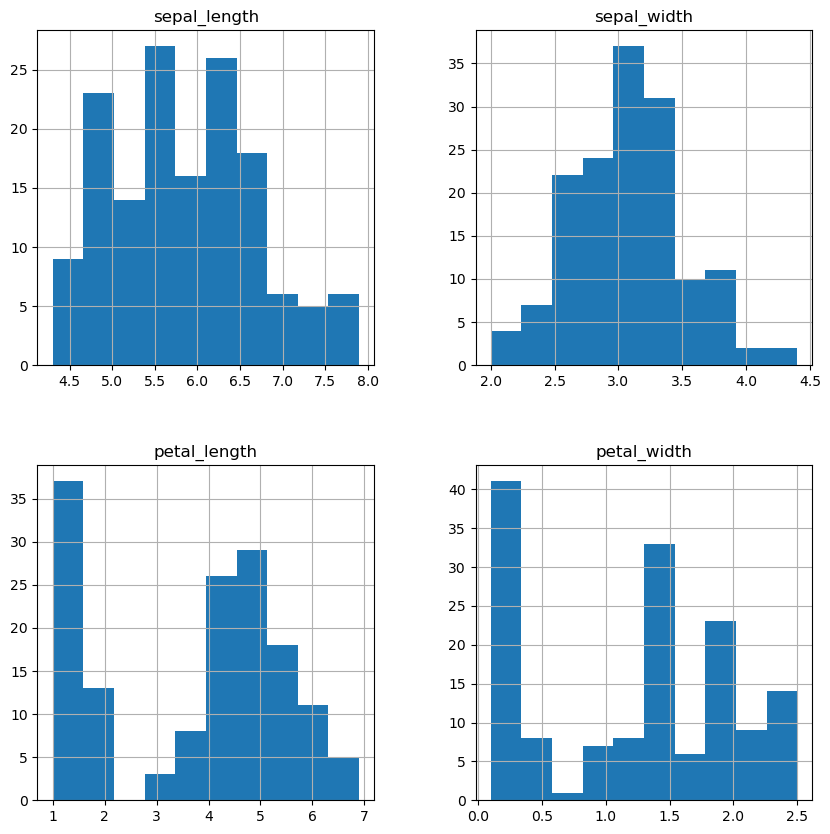

In [31]:
# 히스토그램
iris.hist(figsize = (10, 10))

<Axes: xlabel='petal_length', ylabel='petal_width'>

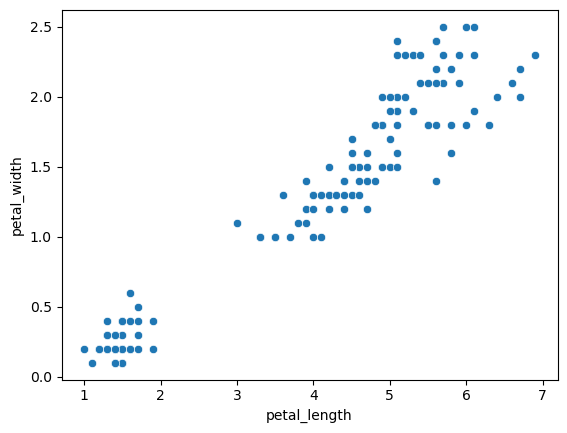

In [32]:
# 산점도
sns.scatterplot(x='petal_length', y='petal_width', data=iris)

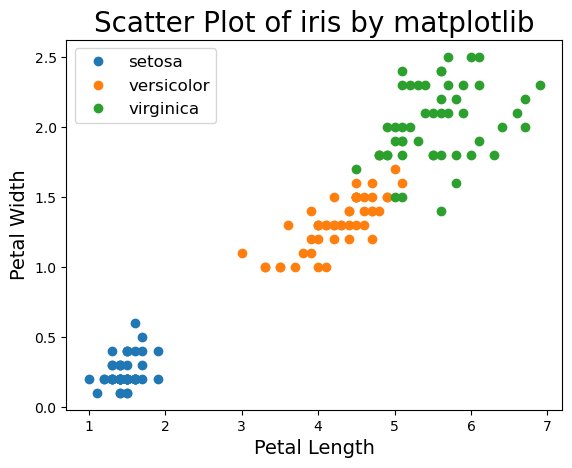

In [33]:
# 그룹 산점도 - matplotlib
groups = iris.groupby('species')
fig, ax = plt.subplots() # 중요
for name, group in groups:
  ax.plot(group.petal_length,
          group.petal_width,
          marker='o',
          linestyle='', label=name)
ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('Scatter Plot of iris by matplotlib', fontsize=20)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

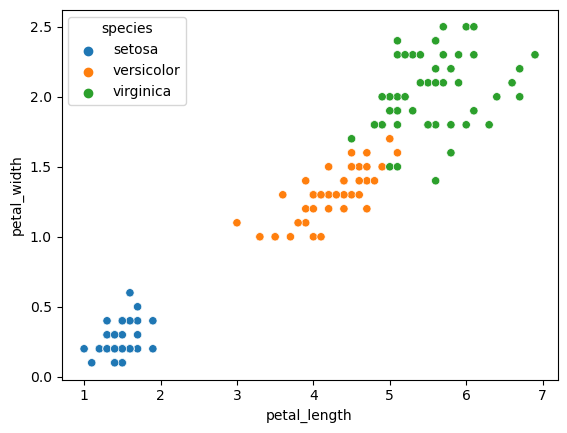

In [34]:
# 그룹 산점도 - seaborn
sns.scatterplot(x="petal_length", y="petal_width", data=iris, hue="species")

In [ ]:
# Q4. matplotlib, seaborn의 다양한 기능을 이용하여 더 많은 EDA를 수행해 봅시다.

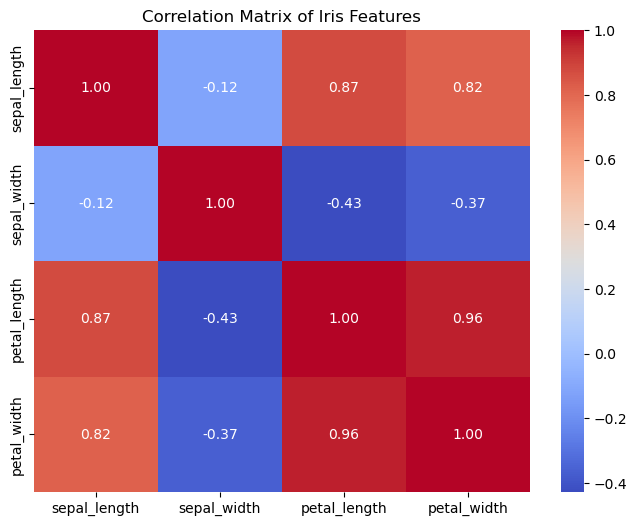

In [35]:
# 상관관계 분석

plt.figure(figsize=(8, 6))
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Features')
plt.show()




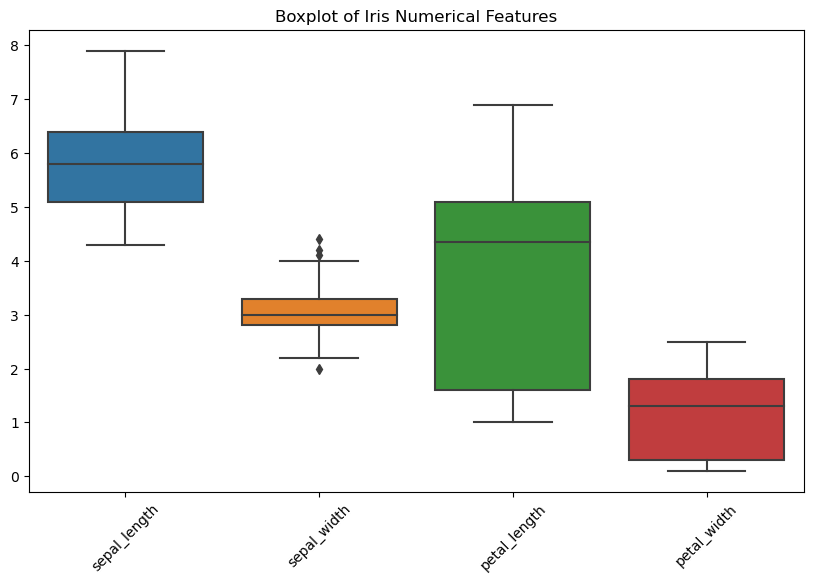

In [36]:
# 상자그림(boxplot)

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris.iloc[:, :-1])  # 마지막 열은 범주형이므로 제외
plt.title('Boxplot of Iris Numerical Features')
plt.xticks(rotation=45)
plt.show()




기타 자유롭게 자신만의 EDA를 수행해 주세요 (optional)

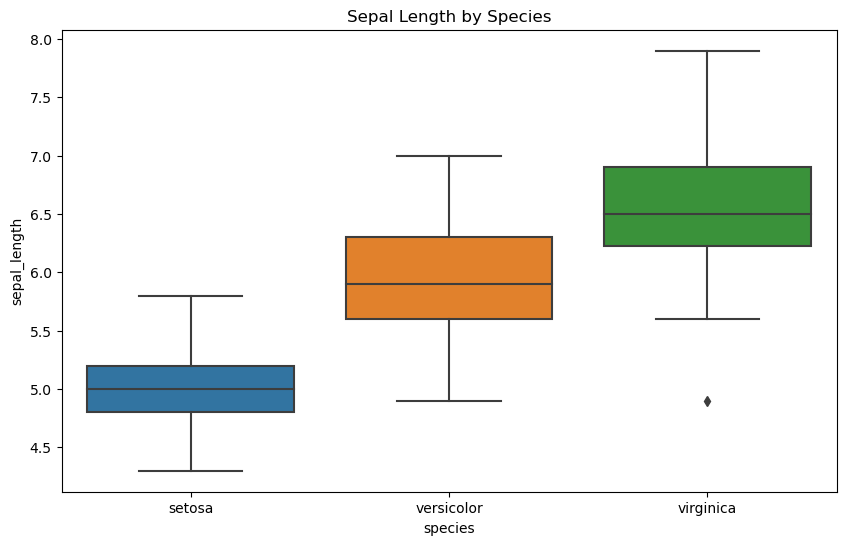

In [ ]:

#species에 따른 boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="sepal_length", data=iris)
plt.title('Sepal Length by Species')
plt.show()
